**The idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.**

**Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.**

# **Why do we need to scale the feature before applying PCA?**
  * **Equal Contribution**
  * **Reduces Bias**

# **HOW DO YOU DO A PRINCIPAL COMPONENT ANALYSIS?**
**Step 1 : Standardize the range of continuous initial variables**

**Step 2 : Compute the covariance matrix to identify correlations**

**Step 3 : Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components**

**Step 4 : Sorting the eigen values in descending order to pick the highest one**

**Step 5 : Recast the data along the principal components axes**

# **Creation of dummy data**

#### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Creating Dummy Data**

In [2]:
data = np.array([[50, 170], [65, 180], [70, 175], [80, 185], [55, 165]])

#### **Let's put this into a dataframe**

In [3]:
df = pd.DataFrame(data, columns = ["X1", "X2"])

In [4]:
df.head()

,X1,X2
0,50,170
1,65,180
2,70,175
3,80,185
4,55,165


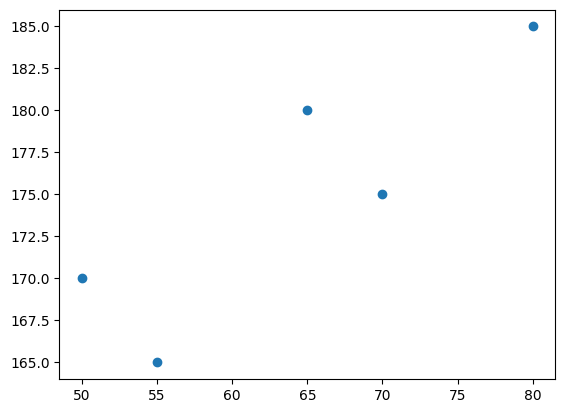

In [5]:
plt.scatter(x = df["X1"], y = df["X2"])

#### **In order to tackle this scenario, let's try to standardize the data**

In [6]:
# Calculate the mean
mean = np.mean(data, axis = 0)

In [7]:
# Calculate the standard Deviation
std = np.std(data, axis = 0)

In [8]:
# Standardize
std_Data = (data - mean) /std

In [9]:
df1 = pd.DataFrame(std_Data, columns = ["X1", "X2"])

In [10]:
df1.head()

,X1,X2
0,-1.311220,-0.707107
1,0.093659,0.707107
2,0.561951,0.000000
3,1.498537,1.414214
4,-0.842927,-1.414214


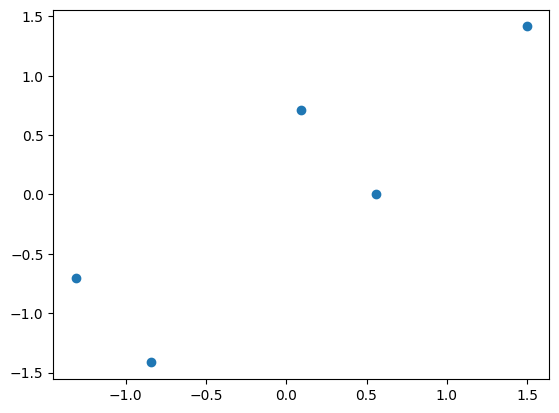

In [11]:
plt.scatter(df1["X1"], df1["X2"])

#### **Covariance Matrix - Understand Correlation**

In [12]:
std_Data.T

array([[-1.31122014,  0.09365858,  0.56195149,  1.4985373 , -0.84292723],
       [-0.70710678,  0.70710678,  0.        ,  1.41421356, -1.41421356]])

In [13]:
covariance_matrix = np.cov(std_Data.T)

#### **Eigen Decomposition**

In [14]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [15]:
print(f"The first eigenvalue for the data is {eigen_values[0]}")
print(f"The second eigenvalue for the data is {eigen_values[1]}")

The first eigenvalue for the data is 2.326182540115348
The second eigenvalue for the data is 0.17381745988465158


#### **How much information each eigen is capturing**

In [16]:
total_info = sum(eigen_values)

In [17]:
a , b = eigen_values[0] / total_info, eigen_values[1] / total_info

In [18]:
print(f"The information with first eigen value: {a*100}")
print(f"The information with second eigen value: {b*100}")

The information with first eigen value: 93.04730160461393
The information with second eigen value: 6.952698395386063


In [19]:
print(f"The eigen vector corresponding to first eigen value: {eigen_vectors[0]}")

The eigen vector corresponding to first eigen value: [ 0.70710678 -0.70710678]


<hr>

# **Hands-on : Load Digits**

#### **Data Loading**

In [20]:
from sklearn.datasets import load_digits

#### **Loading the data into the enviroment**

In [21]:
data = load_digits()

#### **Key components for the data**

In [22]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [23]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [24]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [25]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [26]:
df["Target"] = data.target

#### **Shape Inspection**

In [27]:
df.shape

(1797, 65)

In [28]:
data.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

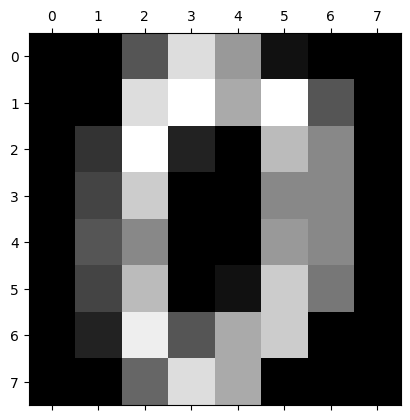

In [29]:
plt.gray()
plt.matshow(data.data[0].reshape(8, 8))
plt.show()

#### **Dividing the data into features and target**

In [30]:
# Features division
X = df.drop("Target", axis = 1)

# Target Variable
Y = df["Target"]

#### **Standardization**

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaled_X = scaler.fit_transform(X)

In [34]:
pd.DataFrame(scaled_X, columns = data.feature_names)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [35]:
# Transpose the data
scaled_X = scaled_X.T

#### **Covariance**

In [36]:
covariance_matrix = np.cov(scaled_X)

In [37]:
pd.DataFrame(covariance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,...,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.394499,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.707913,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.602602,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774


#### **Eigen Decomposition**

In [38]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [39]:
pd.DataFrame(eigen_values)

,0
0,7.344776
1,5.835491
2,5.153961
3,3.966236
4,2.966345
...,...
59,0.200091
60,0.189835
61,0.000000
62,0.000000


#### **Explained Variance**

In [40]:
total_info = sum(eigen_values)

# Individual information for all the eigen values
var_explained = [(x / total_info) for x in sorted(eigen_values, reverse = True)]

In [41]:
pd.DataFrame(var_explained)

,0
0,0.120339
1,0.095611
2,0.084444
3,0.064984
4,0.048602
...,...
59,0.001037
60,0.000825
61,0.000000
62,0.000000


#### **Cummulative Explained Variance**

In [42]:
cumsum_var = np.cumsum(var_explained)

In [43]:
pd.DataFrame(cumsum_var).iloc[20]

,20
0,0.806617


<hr>

# **Skree-plot: Bar plot + Step PLot**

In [44]:
range(len(var_explained))

range(0, 64)

[]

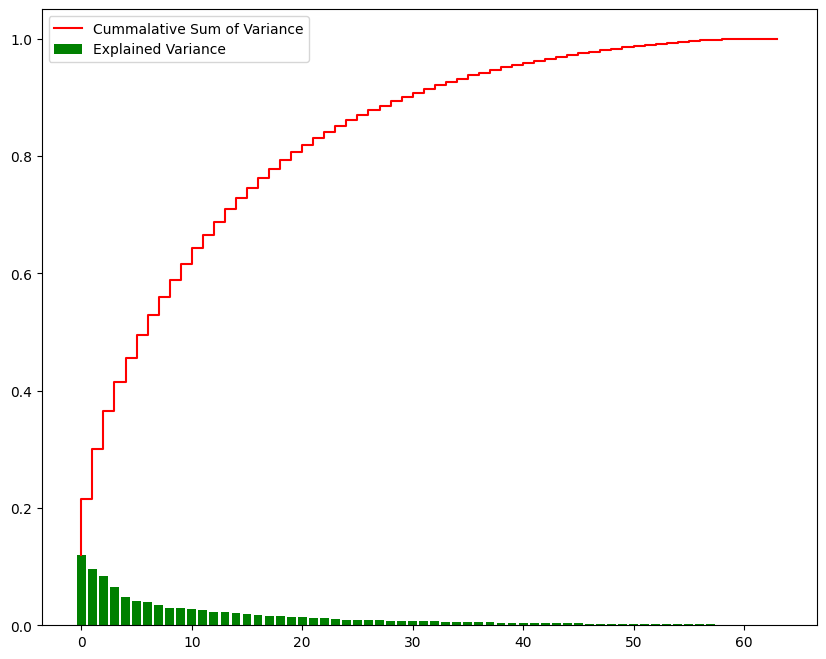

In [45]:
plt.figure(figsize = (10, 8))
plt.bar(range(len(var_explained)), var_explained, label = "Explained Variance", color = "green")
plt.step(range(len(cumsum_var)), cumsum_var, label = "Cummalative Sum of Variance", color = "red")
plt.legend()
plt.plot()

<hr>

# **PCA using LibrarY**

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca_technique = PCA(0.80)

In [48]:
x_pca = pca_technique.fit_transform(X)

In [52]:
pca_technique.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [50]:
pca_technique.n_components_

13

In [53]:
x_pca.shape

(1797, 13)